<a href="https://colab.research.google.com/github/Dharil33/Speech-Emotion-Recognition-using-ML-Classifiers/blob/main/Speech_Emotion_Recogniton_using_ML_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
Root = "/content/drive/MyDrive/Colab Notebooks/Ravdees_emotional_speech_audio"
os.chdir(Root)

In [ ]:
import librosa
import soundfile
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns

In [ ]:
import librosa.display

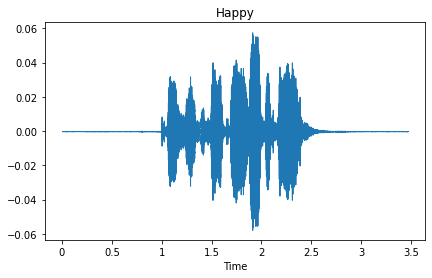

In [ ]:
with soundfile.SoundFile('/content/drive/MyDrive/Colab Notebooks/Ravdees_emotional_speech_audio/speech-emotion-recognition-ravdees-data/Actor_01/03-01-03-01-01-01-01.wav') as audio:
    happywaveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(happywaveform, sr=sample_rate)
    plt.title('Happy')

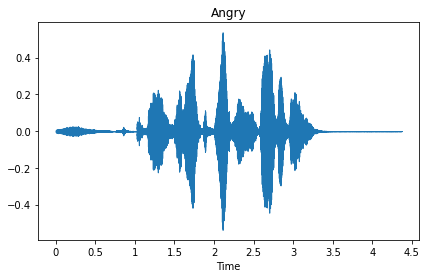

In [ ]:
with soundfile.SoundFile('/content/drive/MyDrive/Colab Notebooks/Ravdees_emotional_speech_audio/speech-emotion-recognition-ravdees-data/Actor_01/03-01-05-02-01-02-01.wav') as audio:
    angrywaveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(angrywaveform, sr=sample_rate)
    plt.title('Angry')

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Ravdees_emotional_speech_audio/speech-emotion-recognition-ravdees-data/"

In [ ]:
ravdess_directory_list = os.listdir(path)


file_emotion = []
file_path = []
for dir in ravdess_directory_list:
   
    actor = os.listdir(path + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        # print(file_emotion)
        file_path.append(path + dir + '/' + file)
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)


Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/Colab Notebooks/Ravdees...
1,neutral,/content/drive/MyDrive/Colab Notebooks/Ravdees...
2,calm,/content/drive/MyDrive/Colab Notebooks/Ravdees...
3,neutral,/content/drive/MyDrive/Colab Notebooks/Ravdees...
4,calm,/content/drive/MyDrive/Colab Notebooks/Ravdees...


In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:
Ravdess_df.Emotions.value_counts()

calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: Emotions, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


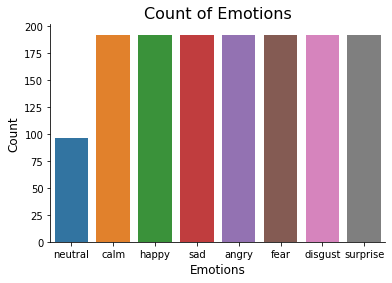

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
data,sr = librosa.load("/content/drive/MyDrive/Colab Notebooks/Ravdees_emotional_speech_audio/speech-emotion-recognition-ravdees-data/Actor_01/03-01-06-01-01-01-01.wav")

In [ ]:
from IPython.display import Audio

In [ ]:
Audio(data=data, rate=sr) #before

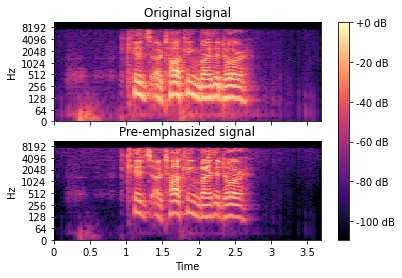

In [ ]:
#Pre-emphasis
y_filt = librosa.effects.preemphasis(data)

S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Pre-emphasized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

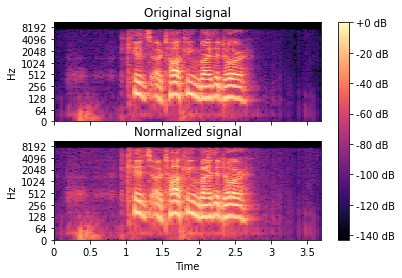

In [ ]:
#Normalization
x_norm=data/max(data)
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(x_norm)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Normalized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

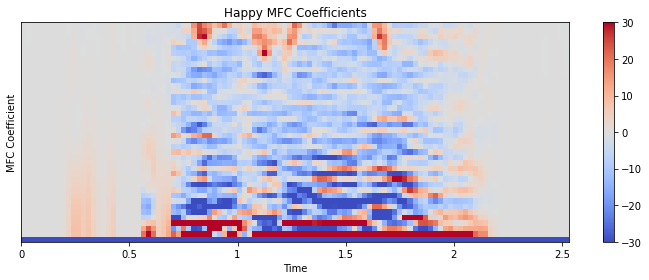

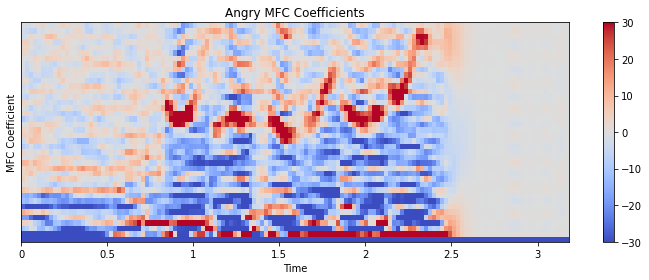

In [ ]:
from matplotlib.colors import Normalize
mfc_coefficients = librosa.feature.mfcc(y=happywaveform, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Happy MFC Coefficients')
plt.tight_layout()
                                        
mfc_coefficients = librosa.feature.mfcc(y=angrywaveform, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Angry MFC Coefficients')
plt.tight_layout()

In [ ]:

emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [ ]:
def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/Ravdees_emotional_speech_audio/speech-emotion-recognition-ravdees-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        features = extract_feature(file,mfcc=True, chroma=True, mel=True)
        X.append(features)
        y.append(emotion)
    return np.array(X), np.array(y)

In [ ]:
features, emotions = load_data()

In [ ]:
len(features)

1440

In [ ]:
emotions

array(['neutral', 'neutral', 'calm', ..., 'surprised', 'surprised',
       'surprised'], dtype='<U9')

In [ ]:
features_df = pd.DataFrame(features)
features_df

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-614.290771,65.165512,3.269717,21.118692,5.892498,12.871241,0.960274,-11.337839,5.043262,1.156389,...,0.000049,0.000032,0.000018,0.000013,0.000017,0.000037,0.000025,0.000035,0.000012,0.000004
1,-625.321106,67.958031,5.829576,21.614729,6.619131,10.801250,1.653787,-10.633741,3.170583,-0.743730,...,0.000062,0.000061,0.000046,0.000030,0.000024,0.000047,0.000059,0.000051,0.000027,0.000012
2,-631.103760,66.457375,15.658061,22.441881,9.244407,13.076656,1.430417,-4.711405,4.917978,-2.191370,...,0.000078,0.000047,0.000042,0.000035,0.000053,0.000084,0.000081,0.000064,0.000047,0.000020
3,-636.943237,65.465149,4.513289,23.204544,7.267828,9.914691,4.393898,-5.784488,3.388004,2.338402,...,0.000019,0.000026,0.000015,0.000014,0.000012,0.000011,0.000009,0.000008,0.000006,0.000004
4,-636.160217,63.424549,12.671864,22.379282,10.959032,9.468088,2.260341,-4.845589,3.931760,0.939333,...,0.000042,0.000055,0.000022,0.000023,0.000019,0.000022,0.000018,0.000017,0.000013,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-441.477142,41.078587,-15.109456,-6.652780,-6.592841,-8.344698,-22.018486,-1.891855,-14.130640,-0.831515,...,0.002788,0.002662,0.002669,0.001897,0.000886,0.001152,0.000622,0.000373,0.000319,0.000382
1436,-513.591003,48.935459,-16.604731,9.085119,-7.339106,-8.483361,-14.965407,-2.267961,-11.360413,2.660300,...,0.002257,0.002256,0.001844,0.002308,0.002326,0.001419,0.000507,0.000283,0.000139,0.000051
1437,-530.230530,47.448292,-11.045321,2.780916,-7.464681,-7.973893,-14.528879,-4.668339,-11.878313,-1.555596,...,0.002028,0.002681,0.001321,0.001028,0.001397,0.001076,0.000569,0.000246,0.000407,0.000473
1438,-487.209351,51.395393,-16.371248,6.179582,-14.418996,-8.309078,-16.478937,-5.844348,-14.635507,-4.086147,...,0.000535,0.000663,0.000569,0.000773,0.000242,0.000129,0.000087,0.000050,0.000084,0.000046


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
features_scaled = features 
features_scaled = scaler.fit_transform(features_scaled)

In [ ]:
features_scaled

array([[-0.38402322,  1.35506732,  0.79321079, ..., -0.38365073,
        -0.35512866, -0.36341462],
       [-0.49351159,  1.52489549,  0.99653622, ..., -0.37358375,
        -0.34226116, -0.35279751],
       [-0.55091088,  1.43363247,  1.7771968 , ..., -0.36467844,
        -0.32618123, -0.34165739],
       ...,
       [ 0.45036842,  0.27758728, -0.34380926, ..., -0.24670256,
        -0.03410871,  0.28185746],
       [ 0.8774016 ,  0.51763188, -0.76683902, ..., -0.37414218,
        -0.29623452, -0.30622058],
       [ 1.28433476, -0.24415525, -0.34803029, ..., -0.22871778,
        -0.19186319, -0.15113519]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, 
    emotions, 
    test_size=0.2, 
    random_state=0
)

In [ ]:
X_train.shape

(1152, 180)

**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
acc1 = accuracy_score(y_test,y_pred)
print(acc1)

0.6319444444444444


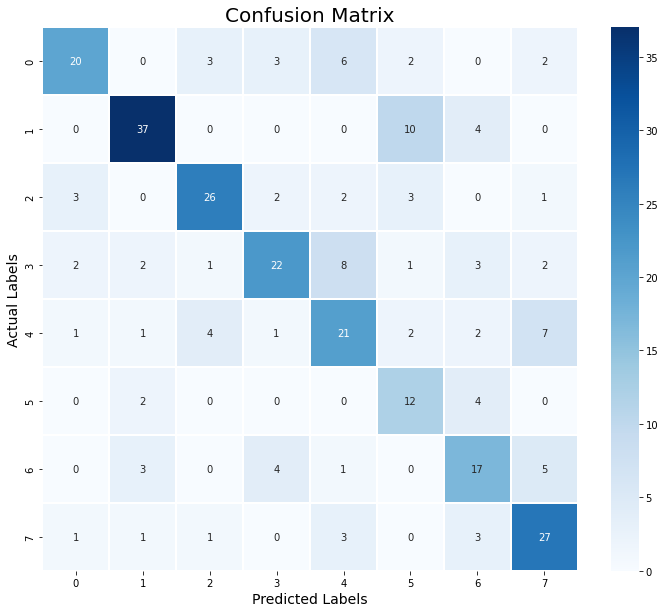

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.74      0.56      0.63        36
        calm       0.80      0.73      0.76        51
     disgust       0.74      0.70      0.72        37
     fearful       0.69      0.54      0.60        41
       happy       0.51      0.54      0.53        39
     neutral       0.40      0.67      0.50        18
         sad       0.52      0.57      0.54        30
   surprised       0.61      0.75      0.67        36

    accuracy                           0.63       288
   macro avg       0.63      0.63      0.62       288
weighted avg       0.65      0.63      0.64       288



**Hyperparameter Tuning for KNN**

In [ ]:
accuracies = []

for i in range(1,10):

    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)


    score = model.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (i, score * 100))
    accuracies.append(score)


k=1, accuracy=63.19%
k=2, accuracy=56.60%
k=3, accuracy=56.94%
k=4, accuracy=53.82%
k=5, accuracy=54.17%
k=6, accuracy=54.86%
k=7, accuracy=52.43%
k=8, accuracy=51.74%
k=9, accuracy=51.04%


**Apply Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

In [ ]:
accuracy_rate

[0.5990254872563717,
 0.5156521739130435,
 0.5078860569715142,
 0.5043703148425787,
 0.48875562218890545,
 0.4904797601199401,
 0.48438530734632684,
 0.4774812593703149,
 0.45233133433283357]

In [ ]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,y_train,cv=10)
    error_rate.append(1-score.mean())

In [ ]:
error_rate

[0.4009745127436283,
 0.4843478260869565,
 0.49211394302848577,
 0.49562968515742134,
 0.5112443778110946,
 0.5095202398800599,
 0.5156146926536731,
 0.5225187406296852,
 0.5476686656671664]

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 145)

In [ ]:
rm.fit(X_train,y_train)

RandomForestClassifier(n_estimators=145)

In [ ]:
y_pred1 = rm.predict(X_test)

In [ ]:
acc2 = accuracy_score(y_test,y_pred1)
print(acc2)

0.5833333333333334


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

       angry       0.78      0.69      0.74        36
        calm       0.68      0.82      0.74        51
     disgust       0.48      0.70      0.57        37
     fearful       0.64      0.44      0.52        41
       happy       0.58      0.36      0.44        39
     neutral       0.60      0.33      0.43        18
         sad       0.43      0.53      0.48        30
   surprised       0.51      0.58      0.55        36

    accuracy                           0.58       288
   macro avg       0.59      0.56      0.56       288
weighted avg       0.60      0.58      0.58       288



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 150)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=150)

In [ ]:
y_pred3 = dt.predict(X_test)

In [ ]:
acc3 = accuracy_score(y_test,y_pred3)
print(acc3)

0.3645833333333333


In [ ]:
df1 = pd.DataFrame({"Actual Label": y_test, "Predicted Label": y_pred3})
df1.head(10)

,Actual Label,Predicted Label
0,fearful,fearful
1,fearful,happy
2,surprised,happy
3,angry,sad
4,sad,sad
5,calm,calm
6,happy,fearful
7,fearful,fearful
8,disgust,angry
9,fearful,surprised


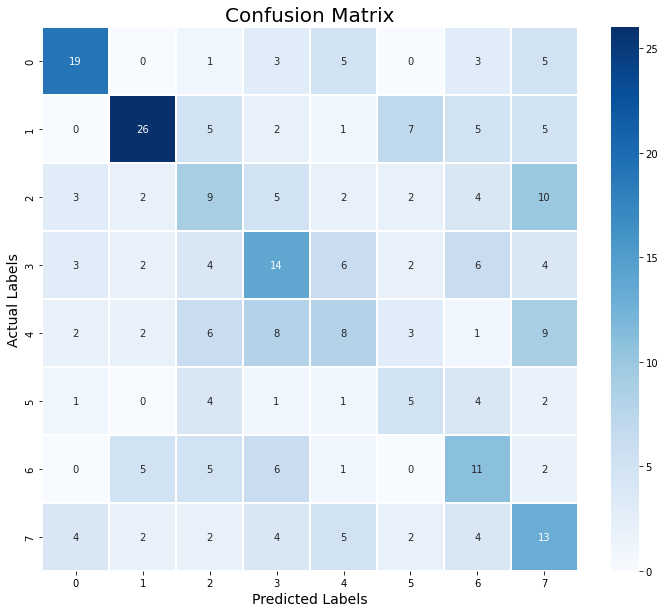

In [ ]:
cm2 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize = (12, 10))
sns.heatmap(cm2, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

       angry       0.59      0.53      0.56        36
        calm       0.67      0.51      0.58        51
     disgust       0.25      0.24      0.25        37
     fearful       0.33      0.34      0.33        41
       happy       0.28      0.21      0.24        39
     neutral       0.24      0.28      0.26        18
         sad       0.29      0.37      0.32        30
   surprised       0.26      0.36      0.30        36

    accuracy                           0.36       288
   macro avg       0.36      0.35      0.35       288
weighted avg       0.39      0.36      0.37       288



**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
sm = SVC(kernel = 'linear')

In [ ]:
sm.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred4 = sm.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred4))

0.4513888888888889


In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

       angry       0.41      0.36      0.38        36
        calm       0.63      0.63      0.63        51
     disgust       0.35      0.49      0.41        37
     fearful       0.57      0.41      0.48        41
       happy       0.43      0.38      0.41        39
     neutral       0.46      0.33      0.39        18
         sad       0.37      0.47      0.41        30
   surprised       0.39      0.42      0.41        36

    accuracy                           0.45       288
   macro avg       0.45      0.44      0.44       288
weighted avg       0.46      0.45      0.45       288



In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=20)

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [ ]:
# #Hyperparameter Tuning for KNN
# for i in range(1,20):
#   pca = PCA(n_components = i)

#   X_train_ht = pca.fit_transform(X_train)
#   X_test_ht = pca.transform(X_test)

#   knn = KNeighborsClassifier(n_neighbors=i)
  
#   knn.fit(X_train_ht,y_train)
#   y_pred_ht = knn.predict(X_test_ht)

#   print("Accuracy:",accuracy_score(y_test,y_pred_ht))